# Extract Clusters from Python Dendrogram - adjusted for Clustermap

Original File: https://nbviewer.jupyter.org/gist/vals/150ec97a5b7db9c82ee9
Blog Post: http://www.nxn.se/valent/extract-cluster-elements-by-color-in-python

In [24]:
from collections import defaultdict
from fastcluster import linkage
from matplotlib.colors import rgb2hex, colorConverter
from matplotlib.pyplot import cm
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
import matplotlib as mpl
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Packages load

In [25]:
df_full = pd.read_csv('df_full.CSV', engine='python', encoding='utf-8', index_col=0)
grouped = df_full.groupby(['geo_bln'])['obj_purchasePrice'].count()
grouped = pd.DataFrame(grouped) 
grouped = grouped.rename(columns={'obj_purchasePrice':'Amount_offers'})
grouped.reset_index(inplace=True)
grouped = grouped.set_index('geo_bln')
grouped

,Amount_offers
geo_bln,
Baden_Württemberg,26712
Bayern,28563
Berlin,5191
Brandenburg,11689
Bremen,1734
Hamburg,2787
Hessen,19827
Mecklenburg_Vorpommern,5795
Niedersachsen,28356


Data load

In [18]:
cmap = cm.rainbow(np.linspace(0, 1, 10))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

Lets set the colors

In [19]:
link = linkage(grouped,  method='single')

First we create the link within the data, we are using the single method but others are possible too, for example:<br>
    -Complete<br>
    -Average<br>
    -Weighted<br>
    -Centroid

In [20]:
class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [34]:
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    print(cluster_idxs)
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

Lets create a function to extract the clusters and display it nicely

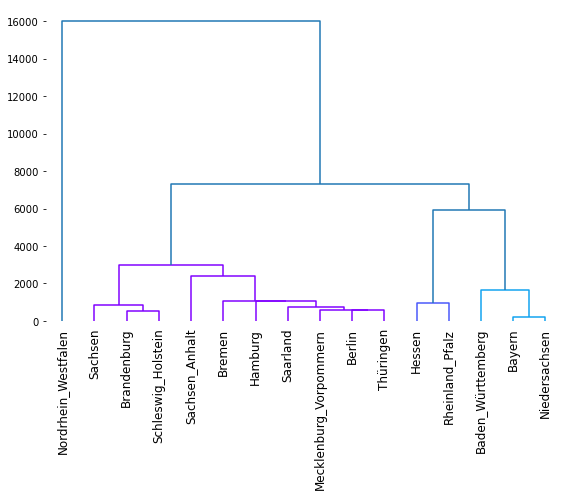

In [35]:
figsize(8, 7)
den = dendrogram(link, labels=grouped.index, color_threshold=4000)#<-change this to change the depth of the clustering
plt.xticks(rotation=90)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);

plt.tight_layout()
plt.savefig('tree1.png');

In this formula, we define the dendogram by using the link which was defined before. If you adjust the color_threshhold, you are able to increase/decrease the depth of the clustering. 

In [36]:
get_cluster_classes(den)

defaultdict(<class 'list'>, {'#8000ff': [2, 3, 1, 9, 10, 8, 7, 6, 5, 4], '#4856fb': [11, 12], '#10a2f0': [14, 15, 13], 'C0': [0]})


#8000ff,"['Brandenburg', 'Schleswig_Holstein', 'Sachsen', 'Berlin', 'Thüringen', 'Mecklenburg_Vorpommern', 'Saarland', 'Hamburg', 'Bremen', 'Sachsen_Anhalt']"
#4856fb,"['Hessen', 'Rheinland_Pfalz']"
#10a2f0,"['Bayern', 'Niedersachsen', 'Baden_Württemberg']"
C0,['Nordrhein_Westfalen']


And now you can extract the clusters from the HTML body. The clusters are named after the corrosponding colors.